In [1]:
import pandas as pd
import cv2
import ast
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
df = pd.read_csv("manynames-en.tsv", sep="\t", index_col=0)

In [10]:
df

,vg_image_id,topname,responses,incorrect,domain,synsets,N,total_responses,perc_top,H,split,vg_synset,link_mn,bbox_xywh
vg_object_id,,,,,,,,,,,,,,
142365,2415294,skateboarder,"{'skateboarder': 11, 'boy': 6, 'person': 6, 's...","{'scatting board': 1, 'human': 1, 'board': 1, ...",people,"{'skateboarder': 'skateboarder.n.01', 'boy': '...",5,31,35.483871,2.198137,train,male_child.n.01,http://manynames.upf.edu/2415294_142365_skateb...,"[78, 84, 182, 228]"
142397,2415292,bench,"{'bench': 33, 'chair': 3}",{},home,"{'bench': 'bench.n.01', 'chair': 'chair.n.01'}",2,36,91.666667,0.413817,train,furnishing.n.02,http://manynames.upf.edu/2415292_142397_bench.png,"[221, 205, 231, 194]"
142433,2415290,giraffe,{'giraffe': 34},{'zebra': 1},animals_plants,{'giraffe': 'giraffe.n.01'},1,34,100.000000,0.000000,train,ungulate.n.01,http://manynames.upf.edu/2415290_142433_giraff...,"[66, 151, 266, 275]"
142664,2415278,man,"{'man': 15, 'biker': 9, 'cyclist': 5, 'person'...","{'boy': 1, 'bicyclist': 1, 'cycle': 1}",people,"{'man': 'man.n.01', 'biker': 'NA', 'cyclist': ...",4,33,45.454545,1.809778,val,male_child.n.01,http://manynames.upf.edu/2415278_142664_man.png,"[189, 162, 142, 252]"
142757,2415274,airplane,"{'airplane': 25, 'plane': 9, 'jet': 1, 'jetlin...",{},vehicles,"{'airplane': 'airplane.n.01', 'plane': 'airpla...",4,36,69.444444,1.152544,train,aircraft.n.01,http://manynames.upf.edu/2415274_142757_airpla...,"[15, 105, 483, 137]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962458,2321036,table,"{'table': 35, 'wood': 1}",{},home,"{'table': 'table.n.02', 'wood': 'NA'}",2,36,97.222222,0.183122,train,furnishing.n.02,http://manynames.upf.edu/2321036_3962458_table...,"[254, 212, 245, 162]"
3962782,2320583,car,"{'car': 31, 'automobile': 1, 'vehicle': 1, 'wh...","{'buggy': 1, 'beetle': 1}",vehicles,"{'car': 'car.n.01', 'automobile': 'NA', 'vehic...",4,34,91.176471,0.570401,val,car.n.01,http://manynames.upf.edu/2320583_3962782_car.png,"[4, 225, 323, 196]"
3963277,2315863,truck,"{'truck': 22, 'vehicle': 2, 'wheel': 1}","{'car': 9, 'tyre': 1, 'pickup': 1}",vehicles,"{'truck': 'truck.n.01', 'vehicle': 'vehicle.n....",3,25,88.000000,0.639556,train,truck.n.01,http://manynames.upf.edu/2315863_3963277_truck...,"[23, 84, 440, 283]"


In [34]:
example_skateboarder = df.iloc[0]

In [18]:
df.iloc[0].bbox_xywh

'[78, 84, 182, 228]'

In [22]:
img = cv2.imread("2415294_142365_skateboarder.png")

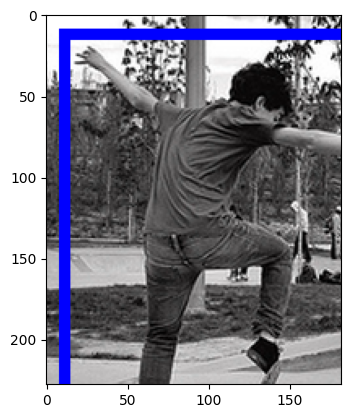

In [30]:
bbox = df.iloc[0].bbox_xywh
bbox = ast.literal_eval(bbox)
cropped_image = img[bbox[1]:bbox[1] + bbox[3], bbox[0]:bbox[0] + bbox[2]]
plt.imshow(cropped_image)

In [31]:
cv2.imwrite('BBox.png', cropped_image)

True

In [32]:
example_caption = "A skateboarder performing a trick in the air."

In [33]:
df.iloc[0]

vg_image_id                                                  2415294
topname                                                 skateboarder
responses          {'skateboarder': 11, 'boy': 6, 'person': 6, 's...
incorrect          {'scatting board': 1, 'human': 1, 'board': 1, ...
domain                                                        people
synsets            {'skateboarder': 'skateboarder.n.01', 'boy': '...
N                                                                  5
total_responses                                                   31
perc_top                                                   35.483871
H                                                           2.198137
split                                                          train
vg_synset                                            male_child.n.01
link_mn            http://manynames.upf.edu/2415294_142365_skateb...
bbox_xywh                                         [78, 84, 182, 228]
Name: 142365, dtype: object

In [54]:
def word_search(word, phrase):
    return word in [words.strip(',.?!') for words in phrase.split()]

In [ ]:
# Find the top responses from caption

In [40]:
ast.literal_eval(example_skateboarder.responses)

{'skateboarder': 11, 'boy': 6, 'person': 6, 'skater': 5, 'man': 3}

In [39]:
responses_dict = ast.literal_eval(example_skateboarder.responses)

In [41]:
top_responses = list(responses_dict.keys())

In [43]:
word_search("skateboarder", example_caption)

True

In [44]:
word_search("boarder", example_caption)

False

In [45]:
found_responses = [response for response in top_responses if word_search(response, example_caption)]

In [ ]:
# Find the top name in the caption

In [51]:
found_top_name = False
example_skateboarder.topname

'skateboarder'

In [52]:
if example_skateboarder.topname in example_caption:
    found_top_name = True

In [53]:
found_top_name

True

In [ ]:
# Find the incorrect responses in the caption

In [46]:
ast.literal_eval(example_skateboarder.incorrect)

{'scatting board': 1, 'human': 1, 'board': 1, 'dress': 1, 'shoe': 1}

In [48]:
incorrect_responses = list(ast.literal_eval(example_skateboarder.incorrect).keys())

In [49]:
found_incorrect = [response for response in incorrect_responses if word_search(response, example_caption)]

In [55]:
# Count occurrences from all VLM responses

In [ ]:
occurrences_all_vlm = defaultdict(int)

In [58]:
def count_occurrences(responses, occurrence_dict):
    for response in responses:
        occurrence_dict[response] += 1

In [59]:
def snodgrass_agreement(rdict):
    vec = np.array([rdict[key] for key in rdict])
    vec_rel = vec/(np.sum(vec))
    agr = np.sum(vec_rel * np.log2(1/vec_rel))
    return agr

In [ ]:
#